In [12]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import scipy as spy

df = pd.read_csv('winequalityN.csv')

Olhando abaixo, tem muitos valores N/A. Vamos substituir eles pela média.

In [4]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
df['fixed acidity'].fillna(df['fixed acidity'].median(), inplace=True)
df['volatile acidity'].fillna(df['volatile acidity'].mean(), inplace=True)
df['citric acid'].fillna(df['citric acid'].mean(), inplace=True)
df['residual sugar'].fillna(df['residual sugar'].mean(), inplace=True)
df['chlorides'].fillna(df['chlorides'].mean(), inplace=True)
df['pH'].fillna(df['pH'].mean(), inplace=True)
df['sulphates'].fillna(df['sulphates'].mean(), inplace=True)

Depois de converter para a média não tem mais N/A:

In [6]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Podemos ver abaixo que existem muitos outliers, não só nessa coluna, mas em várias outras.Vou tentar usar um método para remover os outliers dessa, depois tento remover os das restantes com o mesmo método.

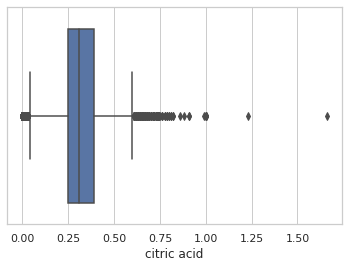

In [10]:
sb.set_theme(style="whitegrid")
ax = sb.boxplot(x=df['citric acid'])

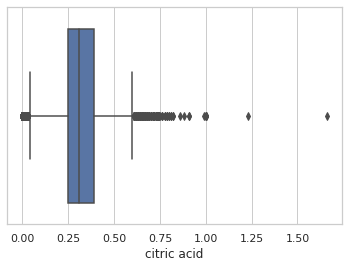

In [34]:
ax = sb.boxplot(x=df['citric acid'])

In [43]:
#spy.stats.zscore(df)
df[cols]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Para calcular o zscore, eu vou ter que tirar as colunas que não são valores float, como a "type" e a "quality" e setar a política de nan para omitir.

In [68]:
cols = list(df.columns)
cols.remove('type')
cols.remove('quality')
df[cols]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Os outliers são definidos como os valores que estão acima de 3 desvios padrões da média. Logo abaixo eu removo eles

In [ ]:
zscores = spy.stats.zscore(df[cols], nan_policy='omit')
abs_zscores = np.abs(zscores)
filtered_entries = (abs_zscores < 3).all(axis=1)
new_df = df[filtered_entries]
df = new_df
df

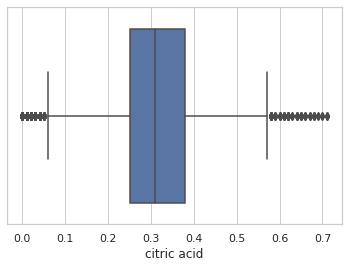

In [69]:
ax = sb.boxplot(x=df['citric acid'])